# Homework 4 : Cleaning & Transforming Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Getting the source from https://www.kaggle.com/NUFORC/ufo-sightings/data

Reading only top 10 rows of scrubbed data

In [303]:
import pandas as pd
ufo = pd.read_csv(r'C:\Users\shrad\Downloads\Python_Assignments\scrubbed.csv',low_memory=False)
ufo.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10-10-1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10-10-1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10-10-1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10-10-1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10-10-1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10-10-1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
6,10-10-1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10-10-1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10-02-1999,41.1175,-73.408333
8,10-10-1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10-10-1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,05-11-2005,30.2947222,-82.984167


In [26]:
ufo.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

Finding the columns with Null values:

In [33]:
ufo.isnull().any()

datetime                False
city                    False
state                    True
country                  True
shape                    True
duration (seconds)      False
duration (hours/min)    False
comments                 True
date posted             False
latitude                False
longitude               False
dtype: bool

This shows there are null values in State,Country,Shape and comments column

In [30]:
ufo.info() #additional info abt ufo Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


This shows that there is only one column with Float type,rest have object(string) datatype

Converting the states and country values in upper case:

In [311]:
ufo['country']=ufo['country'].str.upper()
ufo['state']=ufo['state'].str.upper()


Getting data for State = 'CA' by applying filter:

In [312]:
ufo_CaliData = ufo[ufo['state'] == 'CA']
ufo_CaliData.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10,10-10-1968 13:00,hawthorne,CA,US,circle,300,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667
30,10-10-1979 22:00,san diego,CA,US,oval,180,3 minutes,My 2nd UFO sighting&#44 October 1979,08-05-2001,32.7152778,-117.156389
45,10-10-1989 00:00,calabasas,CA,US,disk,300,approx 5 min,Unidentified object on Mulholland Highway.,12/14/2004,34.1577778,-118.637500
63,10-10-1995 22:40,oakland,CA,US,NaN,60,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11-02-1999,37.8044444,-122.269722
72,10-10-1998 02:30,hollywood,CA,US,changing,300,5 minutes,I was standing outside on Sunset Blvd. at Vine...,11-01-1998,34.0983333,-118.325833


So, we have about 9655 rows with California's UFO data.Cleaning the above Dataset:

In [327]:
ufo_CaliData[['country']] = ufo_CaliData['country'].fillna('US')
pd.set_option('display.max_colwidth', -1)
ufo_CaliData

C:\Users\shrad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shrad\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10,10-10-1968 13:00,hawthorne,CA,US,circle,300,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY WAS POLISHED METAL OF SOME KIND AROUND THE EDGES .,10/31/2003,33.9163889,-118.351667
30,10-10-1979 22:00,san diego,CA,US,oval,180,3 minutes,My 2nd UFO sighting&#44 October 1979,08-05-2001,32.7152778,-117.156389
45,10-10-1989 00:00,calabasas,CA,US,disk,300,approx 5 min,Unidentified object on Mulholland Highway.,12/14/2004,34.1577778,-118.637500
63,10-10-1995 22:40,oakland,CA,US,NaN,60,1 minute,Woman repts. bright light in NW sky&#44 suddenly approaches her&#44 flies slowly overhead. Swept wings&#44 2 blurry lights either side.,11-02-1999,37.8044444,-122.269722
72,10-10-1998 02:30,hollywood,CA,US,changing,300,5 minutes,I was standing outside on Sunset Blvd. at Vine and looked straight up which I normally do not do. I saw three bright white lights in a,11-01-1998,34.0983333,-118.325833
82,10-10-1999 00:01,martinez,CA,US,changing,3600,1 hour,Bright objects&#44 red and green flashing lights (and a diffuse white light off to one side of the larger of the two objects)&#44 about 30 de,10/19/1999,38.0194444,-122.133056
85,10-10-1999 11:00,san diego,CA,US,fireball,3600,1 hour,At 10:45 in the morning&#44 my father and I noticed a small stationary object in the sky.,10/19/1999,32.7152778,-117.156389
87,10-10-1999 20:35,hayward,CA,US,circle,90,60-90 sec,Many different colored glowing objects,11/20/2001,37.6688889,-122.079722
105,10-10-2001 20:35,hayward,CA,US,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF RED POINTS OF LIGHT,11/20/2001,37.6688889,-122.079722
107,10-10-2001 21:30,fresno,CA,US,changing,900,15 min. apprx,Objects were sighted driving north on Highway 5 in California&#39s central valley after night fall&#44 not far past &quot;Kettleman/Fresno&quot; exit s,11/20/2001,36.7477778,-119.771389


Getting more info about the city and datetime of ufo sightings:

In [374]:
ufo_CaliData[['country','state','city','datetime']].head()

,country,state,city,datetime
10,US,CA,hawthorne,10-10-1968 13:00
30,US,CA,san diego,10-10-1979 22:00
45,US,CA,calabasas,10-10-1989 00:00
63,US,CA,oakland,10-10-1995 22:40
72,US,CA,hollywood,10-10-1998 02:30


Considering US data from ufo Dataset and replacing Nan values in country column with 'US'
Reference : https://www.kaggle.com/abigaillarion/ufo-reports-in-united-states ; https://knowledgecenter.zuora.com/BB_Introducing_Z_Business/D_Country%2C_State%2C_and_Province_Codes/B_State_Names_and_2-Digit_Codes

In [375]:
import numpy as np
us_states = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
#us_states
US_Clean_data = ufo[ufo['state'].str.upper().isin(us_states)].sort_values('country').fillna('US')
US_Data = US_Clean_data[US_Clean_data['country'] == 'US']
US_Data.head()
#Checking the data : US_Data['country'].unique()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
53246,6/30/2012 23:00,navarre,FL,US,light,900,15 minutes,No smoke trails or sound. Traveling incredibly fast.,07-04-2012,30.4013889,-86.863611
53243,6/30/2012 22:45,lebanon,NY,US,fireball,60,1 minute,Witnessed four bright red orbs hovering in the sky on Rte 20 near Lebanon Valley Speedway,08-05-2012,42.7813889,-75.648056
53240,6/30/2012 22:15,riverside,RI,US,circle,1200,15 20 minutes,My kids were out side playing when one of them look up to the west and saw a lot of redish Orange orbs in the sky they ran the house to,07-04-2012,41.7672222,-71.365278
53244,6/30/2012 23:00,columbia,NJ,US,sphere,60,60 seconds,Round&#44 bright orange object moving erratically over Warren County NJ,07-04-2012,40.9261111,-75.093056
53239,6/30/2012 22:15,erie,PA,US,sphere,15,15 seconds,Witnessed two incredible UFOs heading east Erie&#44 PA 6/30/12.,07-04-2012,42.1291667,-80.085278


US_data = ufo[ufo['country'] == 'us']

Transforming Data :
Considering the Duration(seconds) column from the above dataset as the length of ufo sighting and converting it to float datatype as it is of string datatype(As seen from ufo.info()).Before converting let's clean the data:

In [376]:
US_Data['duration (seconds)'] = US_Data['duration (seconds)'].str.replace(r'`','')

C:\Users\shrad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
US_Data['duration (seconds)'] = US_Data['duration (seconds)'].astype('float')
US_Data.head()

C:\Users\shrad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
53246,6/30/2012 23:00,navarre,FL,US,light,900.0,15 minutes,No smoke trails or sound. Traveling incredibly fast.,07-04-2012,30.4013889,-86.863611
53243,6/30/2012 22:45,lebanon,NY,US,fireball,60.0,1 minute,Witnessed four bright red orbs hovering in the sky on Rte 20 near Lebanon Valley Speedway,08-05-2012,42.7813889,-75.648056
53240,6/30/2012 22:15,riverside,RI,US,circle,1200.0,15 20 minutes,My kids were out side playing when one of them look up to the west and saw a lot of redish Orange orbs in the sky they ran the house to,07-04-2012,41.7672222,-71.365278
53244,6/30/2012 23:00,columbia,NJ,US,sphere,60.0,60 seconds,Round&#44 bright orange object moving erratically over Warren County NJ,07-04-2012,40.9261111,-75.093056
53239,6/30/2012 22:15,erie,PA,US,sphere,15.0,15 seconds,Witnessed two incredible UFOs heading east Erie&#44 PA 6/30/12.,07-04-2012,42.1291667,-80.085278


Average length of UFO sightings across U.S. states:

In [378]:
US_Data['duration (seconds)'].mean()

5723.26336264

Also, average length of UFO sightings as per every U.S. state:

In [379]:
US_len_avg = US_Data.groupby('state').mean()
US_len_avg['duration (seconds)'].head()

state
AK    4231.830508  
AL    1394.123913  
AR    100867.138889
AZ    5946.797731  
CA    3928.374984  
Name: duration (seconds), dtype: float64

import matplotlib.pyplot as plt
plt.plot(US_len_avg['duration (seconds)'])
plt.show()
plt.xlabel('States')
plt.figure(figsize=(1,1))
plt.ylabel('Duration')

Cleaning the comments column;creating a new column which will contain the cleansed data

In [420]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) # This gives the entire value in the column
US_Data['clean_comments'] = US_Data['comments'].str.replace('[^a-zA-Z0-9 ]+', '').str.lower()
US_Data.head()


C:\Users\shrad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,clean_comments
53246,6/30/2012 23:00,navarre,FL,US,light,900.0,15 minutes,No smoke trails or sound. Traveling incredibly fast.,07-04-2012,30.4013889,-86.863611,no smoke trails or sound traveling incredibly fast
53243,6/30/2012 22:45,lebanon,NY,US,fireball,60.0,1 minute,Witnessed four bright red orbs hovering in the sky on Rte 20 near Lebanon Valley Speedway,08-05-2012,42.7813889,-75.648056,witnessed four bright red orbs hovering in the sky on rte 20 near lebanon valley speedway
53240,6/30/2012 22:15,riverside,RI,US,circle,1200.0,15 20 minutes,My kids were out side playing when one of them look up to the west and saw a lot of redish Orange orbs in the sky they ran the house to,07-04-2012,41.7672222,-71.365278,my kids were out side playing when one of them look up to the west and saw a lot of redish orange orbs in the sky they ran the house to
53244,6/30/2012 23:00,columbia,NJ,US,sphere,60.0,60 seconds,Round&#44 bright orange object moving erratically over Warren County NJ,07-04-2012,40.9261111,-75.093056,round44 bright orange object moving erratically over warren county nj
53239,6/30/2012 22:15,erie,PA,US,sphere,15.0,15 seconds,Witnessed two incredible UFOs heading east Erie&#44 PA 6/30/12.,07-04-2012,42.1291667,-80.085278,witnessed two incredible ufos heading east erie44 pa 63012


Creating WordCloud:

In [394]:
!pip install wordcloud

  Using cached wordcloud-1.3.1.tar.gz
  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'done'
  Stored in directory: C:\Users\shrad\AppData\Local\pip\Cache\wheels\d9\4c\ac\e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


In [398]:
from wordcloud import WordCloud


In [422]:
wordcloud_comm = WordCloud().generate(' '.join(US_Data['clean_comments']))
wordcloud_comm

Reference taken : https://github.com/amueller/word_cloud/blob/master/examples/masked.py

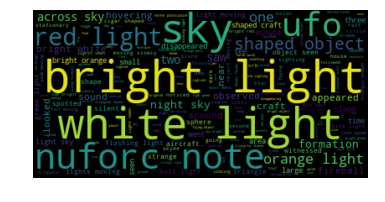

In [426]:
plt.imshow(wordcloud_comm, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

From the above wordcloud, we can make out that there are mentions about the circumstances of ufo sightings especially about the lights in sky.There was bright light in the sky most of the times when UFO was sighted.Sometimes the sky had right light or white light.

In [ ]:
type(wordcloud_comm)

More Analysis about Shape and Time of UFO Sighting :

In [431]:
US_Data[US_Data['clean_comments'].str.contains('light')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,clean_comments
53238,6/30/2012 22:10,ocean park,WA,US,sphere,120.0,2 minutes,Bright red light observed over Southwest Washington coast by 2 people,07-04-2012,46.4916667,-124.048889,bright red light observed over southwest washington coast by 2 people
53250,6/30/2012 23:30,blaine,WA,US,light,120.0,2 minutes,Orange lights over Drayton Harbor,07-04-2012,48.9938889,-122.745833,orange lights over drayton harbor
53253,6/30/2013 00:45,portland,OR,US,US,240.0,4 minutes,Phoenix type lights pdx.,07-03-2013,45.5236111,-122.675000,phoenix type lights pdx
53255,6/30/2013 17:30,canfield,OH,US,diamond,20.0,20 seconds,((HOAX??)) Jun 30th 5:30 pm I spotted a very quick inhuman object with 4 purple lights that&#39s possibly very dangerous.,11-11-2013,41.025,-80.761111,hoax jun 30th 530 pm i spotted a very quick inhuman object with 4 purple lights that39s possibly very dangerous
53257,6/30/2013 20:30,hacienda heights,CA,US,light,120.0,2+ minutes,UFO red light follows plane LAX path over Hacienda Heights.,07-03-2013,33.9930556,-117.967778,ufo red light follows plane lax path over hacienda heights
53264,6/30/2013 23:00,bozeman,MT,US,unknown,180.0,3 minutes,White flash&#44 traveling light&#44 bright white light.,07-03-2013,45.6797222,-111.037778,white flash44 traveling light44 bright white light
53234,6/30/2012 21:47,summerville,SC,US,light,180.0,3 minutes,Three red lights in triangle formation over Summverville&#44 SC. ((NUFORC Note: Report from retired submariner. PD)),07-04-2012,33.0183333,-80.175833,three red lights in triangle formation over summverville44 sc nuforc note report from retired submariner pd
53205,6/30/2011 21:30,lawrenceburg,TN,US,oval,180.0,3 minutes,Large white ball&#44 very high in sky&#44 moved very fast&#44 light beam downward to ground&#44 went over my home then light went out which made is,07-04-2011,35.2422222,-87.334722,large white ball44 very high in sky44 moved very fast44 light beam downward to ground44 went over my home then light went out which made is
53207,6/30/2011 22:00,wyoming,MI,US,triangle,120.0,1-2min,18 Lights in the sky flying faster than ANY aircraft&#33,3/18/2014,42.9133333,-85.705278,18 lights in the sky flying faster than any aircraft33
53208,6/30/2011 22:08,cape girardeau,MO,US,light,120.0,2 mins,Orange Light passing over city&#44 silent.,07-04-2011,37.3058333,-89.518056,orange light passing over city44 silent


The above shows the environment when UFO was sighted

In [432]:
US_Data[US_Data['clean_comments'].str.contains('shape')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,clean_comments
53247,6/30/2012 23:00,niles,OH,US,changing,60.00,one minute,Square box in shape color red to orange&#44 shape changed from square to circle color red to yellow.,07-04-2012,41.1827778,-80.765556,square box in shape color red to orange44 shape changed from square to circle color red to yellow
53256,6/30/2013 20:20,jackson,NJ,US,other,30.00,30 seconds,Pear shaped object 200 yards silently passed by.,07-03-2013,39.7763889,-74.862778,pear shaped object 200 yards silently passed by
53213,6/30/2012 00:00,kansas city,MO,US,cigar,300.00,over1 and a half hours,Five fast.cigar shape images going in circles above our neighbor hood.,07-04-2012,39.0997222,-94.578333,five fastcigar shape images going in circles above our neighbor hood
53222,6/30/2012 13:50,ada,OK,US,disk,180.00,2 - 3 minutes,White&#44 disk shaped object above Ada&#44 OK.,07-04-2012,34.7744444,-96.678056,white44 disk shaped object above ada44 ok
53320,06-03-2002 22:00,spring hill,FL,US,triangle,360.00,6 min,Strange lights in the sky over Spring Hill. Triangular in shape no sound,7/26/2002,28.5555556,-82.450556,strange lights in the sky over spring hill triangular in shape no sound
53343,06-03-2004 21:00,doylestown,PA,US,changing,480.00,8 minutes,A rectangular-shaped object with glowing orange neon lights surrounding its perimiter with separating and high speed capabilities,3/19/2009,40.31,-75.130278,a rectangularshaped object with glowing orange neon lights surrounding its perimiter with separating and high speed capabilities
53316,06-03-2002 15:03,littleton,CO,US,changing,60.00,1 minute,black&#44 relatively stationary craft seen changing shape in windy skies,06-12-2002,39.6133333,-105.016111,black44 relatively stationary craft seen changing shape in windy skies
53270,06-03-1951 13:00,jasper,NC,US,oval,300.00,5 minutes,MIDDAY OVAL SHAPE&#44 ANITQUE COLOR OBJECT SITTING HALF WAY BETWEEN TALL PINE TREES AND THE GROUND.,6/20/2005,35.2013889,-77.206944,midday oval shape44 anitque color object sitting half way between tall pine trees and the ground
53280,06-03-1995 23:30,olympia,WA,US,US,60.00,1 min.,MUFON/WA member reports brief TV news report re &quot;Project Dark Star&#44&quot; a mil. proj. re &quot;disc shaped craft&quot; under development.,11-02-1999,47.0380556,-122.899444,mufonwa member reports brief tv news report re quotproject dark star44quot a mil proj re quotdisc shaped craftquot under development
53283,06-03-1996 20:00,gaithersburg,MD,US,US,2400.00,40 min.,Wife&#44 husband&#44 son witness 3 peculiar objs. in sky. Bright&#44 strobing lights on black&#44 cyl.-shaped craft. No wings. 1 ascends vert.&#33,11-02-1999,39.1433333,-77.201667,wife44 husband44 son witness 3 peculiar objs in sky bright44 strobing lights on black44 cylshaped craft no wings 1 ascends vert33


(US_Data[US_Data['clean_comments'].str.contains('shape')]).plot
plt.show()

wordcloud_comm = WordCloud().generate(' '.join[US_Data[US_Data['clean_comments'].str.contains('shape')])